<a href="https://colab.research.google.com/github/jamierjhill/Personal-Projects/blob/main/Copy_of_Neural_Networks_Lab_Crash_Course_AI_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural networks can perform really powerful tasks. We're going to use them to do something relatively simple, but this framework can be expanded to solve more complex problems.

In this exercise, we're going to use a dataset of handwritten letters called EMNIST. This dataset is a subset of a larger dataset composed of handwritten letters and numbers that was orginally collected from census bureau employees and high school students. 

Because different people write letters differently, programming a neural network to recognize handwritten letters and convert them to typed text is a non-trivial task. For example, think about all of the different ways you've seen people write the letter "J."

**STEP 1**

The first thing we're going to do is import the EMNIST libraries so that we have access to this training set.

In [1]:
# STEP 1.1

!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Cloning into 'python-mnist'...
remote: Enumerating objects: 240, done.
remote: Total 240 (delta 0), reused 0 (delta 0), pack-reused 240
Receiving objects: 100% (240/240), 44.93 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (118/118), done.
--2021-03-31 15:56:59--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/index.html.tmp’

index.html.tmp          [ <=>                ]  28.67K  --.-KB/s    in 0s      

2021-03-31 15:56:59 (278 MB/s) - ‘data/index.html.tmp’ saved [29358]

Loading robots.txt; please ignore errors.
--2021-03-31 15:56:59--  http://yann.lecun.com/robots.txt
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 404 Not Found
2021-03-31 15:56:59 ERROR 404: Not Found.

Removin

Now, we want to grab the data that we want to analyze from these libraries.  In this case, we want to grab the EMNIST "letters" dataset, which is made up of 145,600 28x28 pixel (or 784 pixels in total) images of letters. Each pixel is a grayscale value between 0 and 255. To make it easier for the neural network to process, we divide each value by 255 to get to a number between 0 and 1 for each pixel in each image. Performing a transformation like this to make the data easier to process in a machine learning method is called pre-processing.  Different pre-processing steps may be required for different types of data. 

This dataset also includes the known labels for these images. That's what our neural network is going to learn from. In this case, we'll use the first 60,000 pictures as our training set and then we'll use the following 10,000 pictures as our testing set (and use them to ask the network to check how well it has learned). This is a bit of an arbitrary decision, but based on our experience, this is large enough of a sample (more will just take longer to process but won't improve accuracy of the model) --- but don't take our word for it, you can play around with the training and testing sample on your own. Just remember to always keep the two samples separate.

When you run this cell, it might take a little bit of time -- remember that this code is essentially downloading 70,000 pictures!


In [2]:
# STEP 1.2

# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


To make sure the data downloaded, let's take a look at some of the pictures and labels in the set.  You can change the img_index value to different numbers and run the code as many times as you want to look at the label and picture for different training instances. Some letters are pretty clear (like, 8888 is definitely a "Y"), but others not as much (like, is 1234 a loopy "L" or a "P" or maybe even an "E" at a weird angle?) It's easy to see why this is such a hard task!

But the important thing is that we know that the data downloaded correctly, so we're ready for the next steps.



Image Label: r


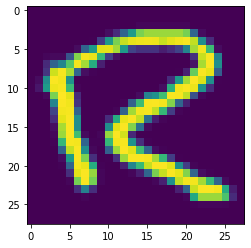

In [5]:
# STEP 1.3

import matplotlib.pyplot as plt

img_index = 12000 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

**STEP 2**

Now that we've looked at the data, let's build a neural network that will be able to take the picture as input and output the corresponding letter.  In this case, we're going to stick to a multi-layer perceptron neural network, or MLP. 

Rather than trying to write all of it from scratch, we're going to import and use an existing library that provides some MLP tools for us. For a lot of AI problems, we can use existing libraries and tweak them to do something new rather than trying to write everything from scratch.

Just to try this out, we'll create a neural network -- a MLP classifier -- with one hidden layer that has 50 neurons in it. We'll have it run through the training data 20 times (that's ```max_iter=20```) so it doesn't take too long. 

We also set a variety of other learning parameters to create the MLP.  You may recognize some of these parameters, like learning rate.  By changing any of these parameters, we can influence how the MLP performs in training and testing, but it's a good idea to try a default approach and then improve on it later.

In [6]:
# STEP 2.1

# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


**STEP 3**

Now that we've created the MLP, let's actually train it and test its ability to recognize some handwritten letters!  Go ahead and "fit" command to see how it will perform -- it might take a minute. As it's learning, it will print status update information about the learning process. You can see the loss value decreasing over each iteration, which means it's getting better at recognizing the training set!

In [7]:
# STEP 3.1

mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.886500
Test set score: 0.840800


You can try running this a couple of times and you'll see that the accuracy and loss will be in the same ballpark but slightly different each time. These differences are due to the fact that the neuron weights are randomly initialized in each run. But if you didn't change anything in the MLP structure above, you're probably seeing something like 89% accuracy on the training dataset and 84% accuracy on the testing dataset.

That's actually pretty good -- it means that the network is guessing correctly 84% of time on letters it's never seen before! It learned! But let's see if we can make it even better. We can explore the dataset to figure out where things went wrong.

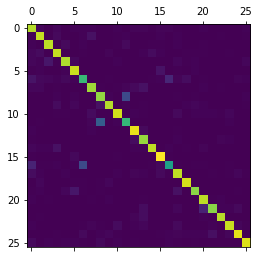

In [8]:
# STEP 3.2

# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

The color of each cell in the confusion matrix represents the number of elements in that cell -- a brighter color means more elements. The rows are the correct value and the columns are the predicted value. The numbers on the axes represent the 26 letters in the alphabet (though EMNIST just represents letters as numbers, so 0=A, 1=B, etc.), so the brightness of cell (0,0) represents the number of times that our network correctly predicted that an "A" is an "A."  The diagonal line of cells shows when the predicted value is correct. It's good to see a bright line! 

If any of the cells off the diagonal are particularly bright, we can investigate more.

For example, "I" and "L" may be easy to confuse ("U" and "V" are also good ones to try!), so let's look at some of the cases where that happened. You can change the code and run it as many times as you want to look at some examples of these mistakes.

There were 84 times that the letter i was predicted to be the letter l.


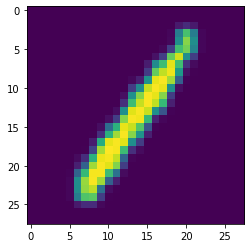

In [9]:
# STEP 3.3

# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

So we can sort of see why the MLP neural network made the mistake here. Even as a human, I probably wouldn't know what some of these letters are unless I could see them in a word and guess from context. Neural networks have a hard job!

On EMNIST, the state-of-the-art machine learning techniques get greater than 96% accuracy, so I think we can also get better than 84%. Let's make a new network called mlp2 and try some things out.

One thing we can try is having more hidden layers and more neurons in the hidden layers. For example, to add another hidden layer of 50 neurons, you can do the following: ```hidden_layer_sizes=(50,50,)```. 

The other thing we can try is training for more epochs (or iterations). For example, we can change our ```max_iter=30```. 

You can play around with the structure to see what happens, but with more layers and more epochs, it takes a longer time for the network to train! So let's just start with 5 layers of 100 neurons each, trained for 50 epochs.

In [10]:
# STEP 3.4

# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25723764
Iteration 13, loss = 0.24258214
Iteration 14, loss = 0.23637540
Iteration 15, loss = 0.23401469
Iteration 16, loss = 0.22697449
Iteration 17, loss = 0.22380151
Iteration 18, loss = 0.21440567
Iteration 19, loss = 0.21530559
Iteration 20, loss = 0.20741802
Iteration 21, loss = 0.21054391
Iteration 22, loss = 0.20267331
Iteration 23, loss = 0.20578210
Iteration 24, loss = 0.19765505
Iteration 25, loss = 0.19409448
Iteration 26, loss = 0.19852713
Iteration 27, loss = 0.19271458
Iteration 28, loss = 0.19833518
Iteration 29, loss = 0.19083645
Iteration 30, loss = 0.19038016
Iteration 31, loss = 0.19140147
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.949467
Test set score: 0.889300


So that's a fair amount of improvement! By having more layers and more training epochs, we got an extra 5% or so of accuracy (remember, this might vary slightly because there is some randomness in the process). That might not seem like a lot, but eliminating 1 in 20 mistakes is actually a pretty big deal!

You can keep playing with the neural network structure in this block and see if you can get even better accuracy. But this should also be good enough for now, so we're ready to apply it to our scanned letters.

**STEP 4**

First, we have to get the scanned letter dataset that we uploaded and saved on GitHub. You can see the raw scanned data set here: https://github.com/crash-course-ai/lab1-neural-networks/tree/master/letters. 

But, as you can see, those images are HUGE. So we've also done a bit of preprocessing to avoid having to download and process quite so much data. We've changed the size of every image to 128x128 pixels.The other thing you may notice is that the EMNIST dataset uses a dark background with light strokes, but our original scans have a white background with dark strokes. So, we also went ahead and inverted those colors. 

This modified dataset is what we'll use in our code and it is also available in the GitHub here: https://github.com/crash-course-ai/lab1-neural-networks/tree/master/letters_mod

In [11]:
# STEP 4.1

# Pulls the scanned data set from GitHub
!git clone https://github.com/crash-course-ai/lab1-neural-networks.git
!git pull
!ls lab1-neural-networks/letters_mod
!cd /content/lab1-neural-networks/letters_mod
!pwd

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("/content/lab1-neural-networks/letters_mod/"))
files.sort()

Cloning into 'lab1-neural-networks'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 4.60 MiB | 3.83 MiB/s, done.
Resolving deltas: 100% (59/59), done.
fatal: not a git repository (or any of the parent directories): .git
00.jpg	10.jpg	20.jpg	30.jpg	40.jpg	50.jpg	60.jpg	70.jpg	80.jpg	90.jpg
01.jpg	11.jpg	21.jpg	31.jpg	41.jpg	51.jpg	61.jpg	71.jpg	81.jpg	91.jpg
02.jpg	12.jpg	22.jpg	32.jpg	42.jpg	52.jpg	62.jpg	72.jpg	82.jpg	92.jpg
03.jpg	13.jpg	23.jpg	33.jpg	43.jpg	53.jpg	63.jpg	73.jpg	83.jpg	93.jpg
04.jpg	14.jpg	24.jpg	34.jpg	44.jpg	54.jpg	64.jpg	74.jpg	84.jpg	94.jpg
05.jpg	15.jpg	25.jpg	35.jpg	45.jpg	55.jpg	65.jpg	75.jpg	85.jpg	95.jpg
06.jpg	16.jpg	26.jpg	36.jpg	46.jpg	56.jpg	66.jpg	76.jpg	86.jpg	96.jpg
07.jpg	17.jpg	27.jpg	37.jpg	47.jpg	57.jpg	67.jpg	77.jpg	87.jpg	97.jpg
08.jpg	18.jpg	28.jpg	38.jpg	48.jpg	58.jpg	68.jpg	78.jpg	88.jpg	98.jpg
09.jpg	19.jpg	29.jpg	39.jpg	49.jpg	59.jpg	69.jpg	79.jpg

Here we'll read each image and add it to a list to hold the handwritten story. We'll also print this image to make sure we read it correctly -- feel free to change this index to see different letters.

Imported the scanned images.


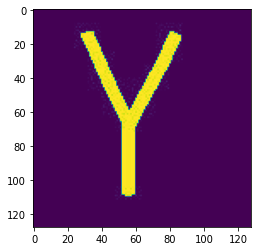

In [14]:
# STEP 4.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/content/lab1-neural-networks/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[78])  #<--- Change this index to see different letters


Well, to the naked eye this looks similar enough to the EMNIST letters and these even seem like they're MORE clear and bright. So, let's try actually getting the story!

We're going to put the handwritten story into our trained MLP and see how it does.

In [15]:
# STEP 4.3

# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tkelfxdltlinlcvnlpaweqlsvpqlieslilefttjinllovelthelwxylyqvrlbxtterylocrslslpwlrlxxoltaenlxlllxplpnce


And... that makes no sense, so what are we doing wrong?

Well, first of all, John-Green-bot's handwritten story had some empty spaces between words. We never actually trained our model on empty spaces, just the 26 letters, so it wouldn't be able to detect these.

But blank pages should be easy to detect. After all, unlike handwritten letters, all blank images should be exactly the same. So, we'll just check each image to see if it's a blank space. And if it is, we'll add a space to our story. 

In [16]:
# STEP 4.4

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tke fxdlt in cvn paweq svpqlies i eftt in love the wxy yqvr bxttery ocrs slpwlr xxo taen xll xp pnce


This looks better. There are separate words, and the first word is "The." But there's still something going wrong.

The papers we scanned were really big compared to the handwritten samples that were used to train EMNIST. We resized them, but that doesn't seem to be enough. So we should try processing these images in the same way that EMNIST did.

So, let's take a look at the orginal EMNIST paper... The paper (https://arxiv.org/abs/1702.05373v1) describes the steps we need to take to process these images in one of the figures. Essentially, we need to make the strokes more blurry, we need to put the letter at the very center of the image and crop out the rest, and we need to resize each one to be 28x28 pixels.

We'll do this processing and then print out one letter to see how it turned out. As always, we can change the index in the code to see a different letter.

Processed the scanned images.


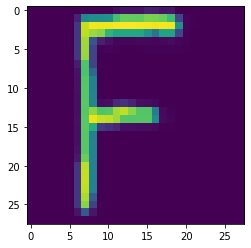

In [17]:
# STEP 4.5

# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

So even though the letter looks less clear now to our human eyes, it actually does look much more similar to the letters in the EMNIST dataset, which is good for our neural network. The edges of the letter are kind of fuzzy and it's centered in the square.

Okay, so now we can try the processing the story with our neural network one more time!

In [18]:
# STEP 4.6

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
the fault in gur pcwer supplfes i fell in love the way your battery dbes sldwly and then all af dnee


We can definitely pick out more of the words! There are still some mistakes because our neural network accuracy wasn't 100%, so we would expect to see about the same rate of error here (maybe even a bit more, since these letters were originally created at a very different size). But, looking at the context and knowing which letters are likely to be mistaken for one another, we can still read the story.

Looks like it starts: 
"The Fault in Our Power Supplies” 
“I fell in love the way your battery dies, slowly and then all at once”

No matter how many times you run the predict code above, it's going to make the exact same mistakes in the final printed string. That's because once a network is trained, it's not really random anymore -- it's always applying the same math to the pixels to make its prediction. To get a different prediction, you have to rerun the code above where you trained mlp2.

We hope that you mess around with some of this code on your own and try to get better accuracy than we got on the scanned story!